In [1]:
import tensorly as tl
from tensorly import decomposition
import numpy as np

In [2]:
PLUS = np.array([.5 ** .5, .5 ** .5])
GHZ = np.array([.5 ** .5, 0, 0, 0, 0, 0, 0, .5 ** .5])
BELL = np.array([.5 ** .5, 0, 0, .5 ** .5])

noise16 = (np.random.random((16,)) - .5) / 1000.0
noise32 = (np.random.random((32,)) - .5) / 1000.0
noise64 = (np.random.random((64,)) - .5) / 1000.0
noise8 = (np.random.random((8,)) - .5) / 1000.0

In [3]:
def to_state(vector):
    return vector / sum(abs(vector)) ** .5

def to_tensor(vector):
    n = int(np.log2(vector.size))
    return vector.reshape([2] * n)

In [59]:
GHZ_ = to_state(GHZ + noise8)
BELL_PLUS = to_state(np.kron(BELL, PLUS) + noise8)
BELL_BELL = to_state(np.kron(BELL, BELL) + noise16)
PLUS_GHZ = to_state(np.kron(PLUS, GHZ) + noise16)
GHZ_PLUS = to_state(np.kron(GHZ, PLUS) + noise16)
GHZ_BELL = to_state(np.kron(GHZ, BELL) + noise32)
BELL_GHZ = to_state(np.kron(BELL, GHZ) + noise32)
GHZ_GHZ = to_state(np.kron(GHZ, GHZ) + noise64)

In [60]:
GHZ_ = to_tensor(GHZ_)
BELL_PLUS = to_tensor(BELL_PLUS)
BELL_BELL = to_tensor(BELL_BELL)
PLUS_GHZ = to_tensor(PLUS_GHZ)
GHZ_PLUS = to_tensor(GHZ_PLUS)
GHZ_BELL = to_tensor(GHZ_BELL)
BELL_GHZ = to_tensor(BELL_GHZ)
GHZ_GHZ = to_tensor(GHZ_GHZ)
G_PLUS_HZ = tl.moveaxis(PLUS_GHZ.copy(), [0, 1, 2, 3], [1, 0, 2, 3])
GH_PLUS_Z = tl.moveaxis(GHZ_PLUS.copy(), [0, 1, 2, 3], [0, 1, 3, 2])

In [52]:
def get_singular_sum(tensor):
    import itertools
    from collections import Counter
    core, matrices = tl.decomposition.tucker(tensor, rank=tensor.shape)
    result = Counter()
    for index in itertools.product([0, 1], repeat=len(tensor.shape)):
        value = core[index]
        for i, v in enumerate(index):
            if v == 1:
                result[i] += abs(value)
    return result.most_common()[::-1]

In [53]:
print(get_singular_sum(PLUS_GHZ))
print(get_singular_sum(GHZ_PLUS))
print(get_singular_sum(G_PLUS_HZ))
print(get_singular_sum(GH_PLUS_Z))

[(0, 0.0006223970681416857), (2, 0.9089377292911854), (3, 0.9170392408184062), (1, 0.9420750683524431)]
[(3, 0.0009316659865789348), (2, 0.9043701179093628), (0, 0.9265975243424831), (1, 0.9679805228018523)]
[(1, 0.0006223970681416861), (2, 0.9089377292912105), (3, 0.9170392408183982), (0, 0.9420750683524617)]
[(2, 0.000931665986578782), (3, 0.9043701179093938), (0, 0.9265975243424934), (1, 0.9679805228018855)]


In [54]:
get_singular_sum(BELL_BELL) # does not work as good as for a single qubit

[(0, 0.7073819753431779),
 (2, 0.7074861211965506),
 (3, 0.7075492287201822),
 (1, 0.7077745645848705)]

In [55]:
def to_plot(data):
    d = [x[1] for x in data]
    l = [x[0] for x in data]
    return d, l

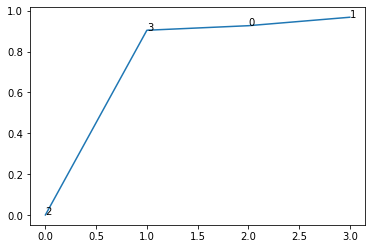

In [56]:
import matplotlib.pyplot as plt
data, labels = to_plot(get_singular_sum(GH_PLUS_Z))
plt.plot(data)
for i, label in enumerate(labels):
    plt.annotate(str(label), (i, data[i]))

# Rolling the Bell-Bell tensor

In [80]:
core, matrices = tl.decomposition.tucker(BELL_BELL, rank=BELL_BELL.shape)

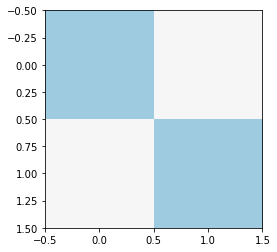

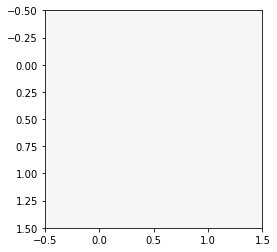

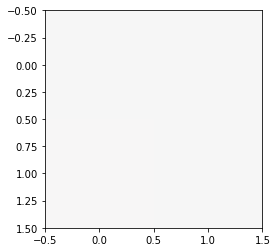

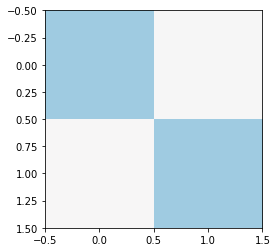

In [81]:
for i in range(4):
    plt.imshow(core.reshape(2, 2, -1)[:, :, i], vmax=1, vmin=-1, cmap="RdBu")
    plt.show()

# Hypothesis test

In [97]:
def get_singular_group_sum(tensor, k=2):
    import itertools
    from collections import Counter
    core, matrices = tl.decomposition.tucker(tensor, rank=tensor.shape)
    result = Counter()
    for index in itertools.product([0, 1], repeat=len(tensor.shape)):
        value = core[index]
        for subindex in itertools.product([0, 1], repeat=k):
            for pair in itertools.combinations(range(len(tensor.shape)), r=k):
                tpl = tuple(subindex + pair)
                if all(index[pair[i]] == subindex[i] for i in range(k)):
                    result[tpl] += abs(value)
            
    return result.most_common()[::-1]

In [99]:
get_singular_group_sum(GHZ_GHZ, k=4)

[((1, 0, 1, 0, 0, 1, 3, 4), 0.007042245239643521),
 ((0, 1, 1, 0, 0, 1, 3, 4), 0.007404001148594492),
 ((0, 1, 0, 1, 0, 1, 3, 4), 0.007494981898392379),
 ((1, 0, 0, 1, 0, 1, 3, 4), 0.008055964573092564),
 ((1, 0, 1, 0, 1, 2, 3, 4), 0.009701057006309955),
 ((1, 0, 0, 1, 1, 2, 3, 4), 0.01035597492809499),
 ((0, 1, 1, 0, 1, 2, 3, 4), 0.010901685783168634),
 ((1, 0, 1, 0, 0, 2, 3, 4), 0.011071809599010465),
 ((1, 1, 0, 1, 0, 3, 4, 5), 0.011541772836743153),
 ((0, 1, 0, 1, 2, 3, 4, 5), 0.011642491386921217),
 ((0, 1, 0, 1, 1, 3, 4, 5), 0.011686889595726448),
 ((1, 1, 0, 1, 1, 3, 4, 5), 0.011725572843184623),
 ((0, 1, 0, 1, 1, 2, 3, 4), 0.01176863930514481),
 ((1, 1, 0, 1, 2, 3, 4, 5), 0.011769971051989856),
 ((0, 1, 0, 1, 0, 3, 4, 5), 0.011870689602167922),
 ((1, 0, 0, 1, 0, 2, 3, 4), 0.011967259185317469),
 ((0, 1, 1, 0, 0, 2, 3, 4), 0.012634194284820113),
 ((0, 1, 0, 1, 0, 2, 3, 4), 0.012818940887667102),
 ((0, 1, 0, 1, 0, 1, 4, 5), 0.01299096570450518),
 ((0, 1, 1, 0, 0, 1, 4, 5), 0.0130

In [111]:
w, f = tl.decomposition.parafac(GHZ_GHZ, rank=1)

In [113]:
f

[array([[-1.48610242e-04],
        [ 3.30846251e-01]]),
 array([[ 7.68853047e-05],
        [-1.00687521e+00]]),
 array([[ 1.04239053e-03],
        [-1.05027530e+00]]),
 array([[-1.00128708e+00],
        [-2.17863485e-04]]),
 array([[-1.00036032e+00],
        [-2.29808014e-04]]),
 array([[ 1.00587317e+00],
        [-9.30003565e-04]])]